## Preprocessing

In [73]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(5)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [74]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df_copy = application_df.copy()

In [75]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [76]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [77]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [78]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
C2190        1
C4200        1
C2600        1
C5200        1
C1370        1
C1248        1
C6100        1
C1820        1
C1900        1
C1236        1
C3700        1
C2570        1
C1580        1
C1245        1
C2500        1
C1570        1
C1283        1
C2380        1
C1732        1
C1728        1
C2170        1
C4120     

In [79]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [80]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 500
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [81]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_application_df = pd.get_dummies(application_df)
dummy_application_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [82]:
# Split our preprocessed data into our features and target arrays
X = dummy_application_df.drop('IS_SUCCESSFUL', axis=1)
y = dummy_application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [83]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3600      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, verbose=2, batch_size=16)

Epoch 1/100
1608/1608 - 8s - loss: 0.5674 - accuracy: 0.7206 - 8s/epoch - 5ms/step
Epoch 2/100
1608/1608 - 4s - loss: 0.5557 - accuracy: 0.7296 - 4s/epoch - 2ms/step
Epoch 3/100
1608/1608 - 4s - loss: 0.5522 - accuracy: 0.7292 - 4s/epoch - 3ms/step
Epoch 4/100
1608/1608 - 4s - loss: 0.5503 - accuracy: 0.7302 - 4s/epoch - 2ms/step
Epoch 5/100
1608/1608 - 4s - loss: 0.5491 - accuracy: 0.7322 - 4s/epoch - 2ms/step
Epoch 6/100
1608/1608 - 3s - loss: 0.5477 - accuracy: 0.7318 - 3s/epoch - 2ms/step
Epoch 7/100
1608/1608 - 1s - loss: 0.5470 - accuracy: 0.7319 - 1s/epoch - 925us/step
Epoch 8/100
1608/1608 - 1s - loss: 0.5458 - accuracy: 0.7322 - 1s/epoch - 912us/step
Epoch 9/100
1608/1608 - 1s - loss: 0.5458 - accuracy: 0.7322 - 1s/epoch - 916us/step
Epoch 10/100
1608/1608 - 1s - loss: 0.5449 - accuracy: 0.7355 - 1s/epoch - 907us/step
Epoch 11/100
1608/1608 - 1s - loss: 0.5444 - accuracy: 0.7336 - 1s/epoch - 932us/step
Epoch 12/100
1608/1608 - 1s - loss: 0.5448 - accuracy: 0.7355 - 1s/epoch - 

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1, batch_size=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 [==============================] - 8s 943us/step - loss: 0.5594 - accuracy: 0.7297
Loss: 0.5594072341918945, Accuracy: 0.72967928647995


In [16]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

## Optimization Method 1 - Add/Drop Columns

In [92]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Make a copy of the working dataset
application_df_op1 = application_df_copy.copy()

# Create X y data of the unaltered dataset to make Lasso and Ridge tests with
dummy_default_df = pd.get_dummies(application_df_copy)

Xdefault = dummy_default_df.drop('IS_SUCCESSFUL', axis=1)
ydefault = dummy_default_df['IS_SUCCESSFUL']

X_train_Default, X_test_Default, y_train_Default, y_test_Default = train_test_split(Xdefault, ydefault, test_size=0.25, random_state=1)

X_scaler_Default = scaler.fit(X_train_Default)

X_train_scaled_Default = X_scaler_Default.transform(X_train_Default)
X_test_scaled_Default = X_scaler_Default.transform(X_test_Default)

In [85]:
# Create a Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust the alpha parameter for regularization strength
lasso_model.fit(X_train_Default, y_train_Default)

lasso_predictions = lasso_model.predict(X_test_Default)
lasso_rmse = mean_squared_error(y_test_Default, lasso_predictions, squared=False)
print("Lasso RMSE:", lasso_rmse)

# Create a Ridge model
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha parameter for regularization strength
ridge_model.fit(X_train_Default, y_train_Default)

ridge_predictions = ridge_model.predict(X_test_Default)
ridge_rmse = mean_squared_error(y_test_Default, ridge_predictions, squared=False)
print("Ridge RMSE:", ridge_rmse)

Lasso RMSE: 0.49911599627875314
Ridge RMSE: 0.44144622854052645


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.66371e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [93]:
lasso_coeffs = lasso_model.coef_
ridge_coeffs = ridge_model.coef_

# make an array of columns to drop after failing Lasso and Ridge tests
drop_columns = []
coefficients_df = pd.DataFrame(columns=["Column", "Lasso Coefficient", "Ridge Coefficient", "Drop_Potential"])

for i in range(len(lasso_coeffs)):
    if lasso_coeffs[i] == 0 and ((ridge_coeffs[i] > -0.1 and ridge_coeffs[i] <= 0) or (ridge_coeffs[i] < 0.1 and ridge_coeffs[i] >= 0)):
        drop_columns.append(i)

print(drop_columns)

[3, 4, 7, 15, 18, 20, 21, 22, 24, 26, 28, 31, 32, 34, 43, 45, 46, 49, 50, 54, 63, 64, 65, 68, 72, 75, 79, 83, 86, 90, 93, 96, 97, 99, 101, 102, 103, 104, 108, 110, 111, 113, 114, 115]


In [88]:
cutoff_value = 500
application_types_to_replace = application_df_op1['APPLICATION_TYPE'].value_counts()[application_df_op1['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

for app in application_types_to_replace:
    application_df_op1['APPLICATION_TYPE'] = application_df_op1['APPLICATION_TYPE'].replace(app,"Other")

In [89]:
cutoff_value = 500
classifications_to_replace = application_df_op1['CLASSIFICATION'].value_counts()[application_df_op1['CLASSIFICATION'].value_counts() < cutoff_value].index.tolist()

for cls in classifications_to_replace:
    application_df_op1['CLASSIFICATION'] = application_df_op1['CLASSIFICATION'].replace(cls,"Other")

In [90]:
dummy_working_op1_df = pd.get_dummies(application_df_op1)
dummy_working_op1_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


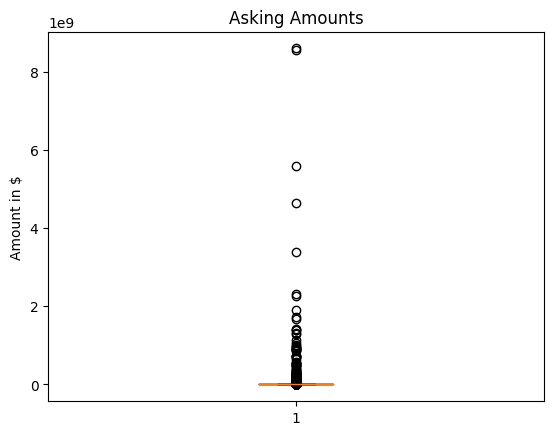

In [68]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Asking Amounts')
ax1.set_ylabel('Amount in $')
ax1.boxplot(dummy_working_op1_df['ASK_AMT'])
plt.show()

In [71]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(dummy_working_op1_df['ASK_AMT'],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print("Lower boundry: ", lower_bound, " | Upper boundry: ", upper_bound)

potential_outliers = [AMT for AMT in dummy_working_op1_df['ASK_AMT'] if AMT < lower_bound or AMT > upper_bound]
print("Samples in dataset prior to outlier removal: " + str(len(dummy_working_op1_df['ASK_AMT'])))
print("After outlier removal: " + str(len(dummy_working_op1_df['ASK_AMT']) - len(potential_outliers)))

Lower boundry:  887.0  | Upper boundry:  11855.0
Samples in dataset prior to outlier removal: 34299
After outlier removal: 26093


In [72]:
# Drop the unnecessary rows from the dataset
condensed_data = dummy_working_op1_df.drop(dummy_working_op1_df.columns[drop_columns], axis=1)
condensed_data = condensed_data[~condensed_data['ASK_AMT'].isin(potential_outliers)]
print(condensed_data.shape)

IndexError: ignored

In [44]:
X1 = condensed_data.drop('IS_SUCCESSFUL', axis=1)
y1 = condensed_data['IS_SUCCESSFUL']
print(X1.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=1)

X_scaler1 = scaler.fit(X_train1)

X_train_scaled1 = X_scaler1.transform(X_train1)
X_test_scaled1 = X_scaler1.transform(X_test1)

(26093, 72)


In [45]:
# Define the model
nn_op1 = tf.keras.models.Sequential()

# First hidden layer
nn_op1.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled1.shape[1]))

# Second hidden layer
nn_op1.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_op1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_op1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                5840      
                                                                 
 dense_10 (Dense)            (None, 30)                2430      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________


In [46]:
nn_op1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = nn_op1.fit(X_train_scaled1, y_train1, epochs=100, verbose=1, batch_size=16)

Epoch 1/100
1224/1224 [==============================] - 3s 2ms/step - loss: 0.6305 - accuracy: 0.6334
Epoch 2/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.6162 - accuracy: 0.6471
Epoch 3/100
1224/1224 [==============================] - 1s 1ms/step - loss: 0.6136 - accuracy: 0.6469
Epoch 4/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.6103 - accuracy: 0.6465
Epoch 5/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.6094 - accuracy: 0.6505
Epoch 6/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.6086 - accuracy: 0.6492
Epoch 7/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.6081 - accuracy: 0.6483
Epoch 8/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.6077 - accuracy: 0.6512
Epoch 9/100
1224/1224 [==============================] - 2s 1ms/step - loss: 0.6072 - accuracy: 0.6505
Epoch 10/100
1224/1224 [==============================] - 2s 1ms/step - l

KeyboardInterrupt: ignored

In [29]:
model_loss, model_accuracy = nn_op1.evaluate(X_test_scaled1,y_test1,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

536/536 [==============================] - 1s 1ms/step - loss: 0.5716 - accuracy: 0.7230
Loss: 0.571590781211853, Accuracy: 0.7230320572853088


## Optimization Method 2 - Altering Model

In [28]:
# Model creation function for ease of coding later
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    activation = hp.Choice('activation', ['relu', 'tanh', 'leaky_relu']) # removed 'selu', 'elu', & 'sigmoid'

    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=100,
        max_value=100,
        step=5), activation=activation, input_dim=X_train1.shape[1]))
    
    for i in range(hp.Int('num_layers', 3, 8)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=100,
            max_value=100,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [29]:
# Install & import the kerastuner library
!pip install keras_tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.0 MB/s eta 0:00:00


In [30]:
tuner = kt.Hyperband(
    create_model,
    objective="accuracy",
    max_epochs=10,
    hyperband_iterations=2)

In [31]:
tuner.search(X_train_scaled1,y_train1,epochs=5,validation_data=(X_test_scaled1,y_test1), batch_size=16)

Trial 31 Complete [00h 00m 13s]
accuracy: 0.7288135886192322

Best accuracy So Far: 0.7365106344223022
Total elapsed time: 00h 12m 32s


In [32]:
top_hyper = tuner.get_best_hyperparameters(5)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 100, 'num_layers': 4, 'units_0': 100, 'units_1': 100, 'units_2': 100, 'units_3': 100, 'units_4': 100, 'units_5': 100, 'units_6': 100, 'units_7': 100, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0023'}
{'activation': 'relu', 'first_units': 100, 'num_layers': 6, 'units_0': 100, 'units_1': 100, 'units_2': 100, 'units_3': 100, 'units_4': 100, 'units_5': 100, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012', 'units_6': 100, 'units_7': 100}
{'activation': 'relu', 'first_units': 100, 'num_layers': 7, 'units_0': 100, 'units_1': 100, 'units_2': 100, 'units_3': 100, 'units_4': 100, 'units_5': 100, 'units_6': 100, 'units_7': 100, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}
{'activation': 'leaky_relu', 'first_units': 100, 'num_layers': 3, 'units_0': 100, 'units_1': 100, 'units_2

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_op = tf.keras.models.Sequential()

# Take optimized hyperparams and make a model
nn_op.add(tf.keras.layers.Dense(units=param.values['first_units'], activation=param.values['activation'], input_dim=X_train_scaled.shape[1]))
for i in range(param.values['num_layers']):
    nn_op.add(tf.keras.layers.Dense(units=param.values[f'units_{i}'], activation=param.values['activation']))

# Output layer
nn_op.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_op.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               4500      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                

In [34]:
# Compile the model
nn_op.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Train the model
history = nn_op.fit(X_train_scaled, y_train, epochs=100, verbose=1, batch_size=16)

Epoch 1/100
804/804 [==============================] - 9s 9ms/step - loss: 0.5692 - accuracy: 0.7222
Epoch 2/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5549 - accuracy: 0.7286
Epoch 3/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5521 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5506 - accuracy: 0.7310
Epoch 5/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5491 - accuracy: 0.7324
Epoch 6/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5479 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5472 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5474 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5462 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5448 - acc

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_op.evaluate(X_test_scaled,y_test,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 [==============================] - 22s 2ms/step - loss: 0.5886 - accuracy: 0.7280
Loss: 0.5885549187660217, Accuracy: 0.7280466556549072


In [37]:
# Export our model to HDF5 file
nn_op.save('AlphabetSoupCharity_Optimization.h5')

## Optimization Method 3 - Oversampling